In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pylab as plt
color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()

In [0]:
# 디렉토리 변경
import os
os.chdir('drive/My Drive/Colab Notebooks/DACON/AIFrenz_Season2/')

In [0]:
# data 불러오기
import numpy as np
train = np.load('./Data/dacon_npy/train.npy')

In [0]:
# nan 있는거 제거
# 강수량 픽셀 n개 이하 제거
num=[]
n = 50
for i in range(train.shape[0]):
    if ((train[i,:,:,-1]>0).sum() > n) and ((train[i,:,:,-1]<0).sum() <= 0):
        num.append(i)

len(num) / train.shape[0]

0.39904381426419544

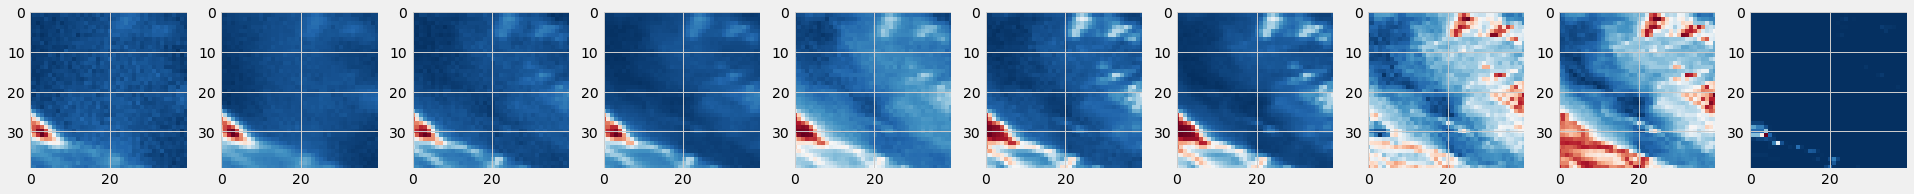

In [0]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 30))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train[0, :, :, i], cmap=color_map)

plt.show()

In [0]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
img_datagen = ImageDataGenerator(rotation_range=20,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)

In [0]:
genTrain = img_datagen.flow(train, batch_size=train.shape[0], shuffle=False)[0]
genTrain.shape

(30465, 40, 40, 10)

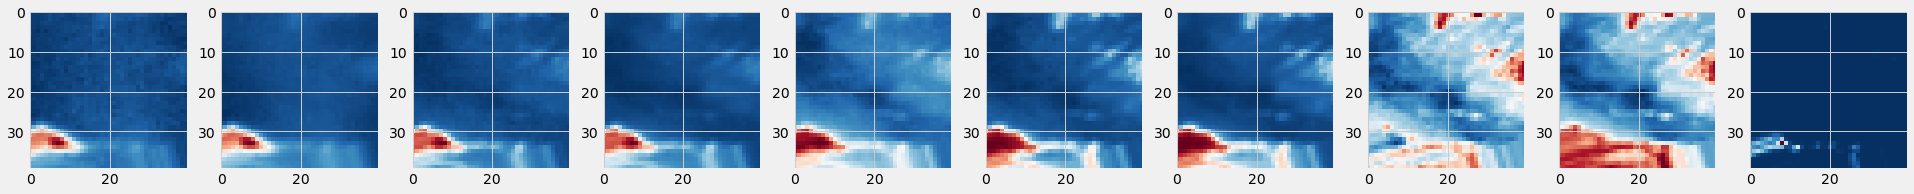

In [0]:
img = genTrain[0]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 30))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(img[:, :, i], cmap=color_map)

plt.show()

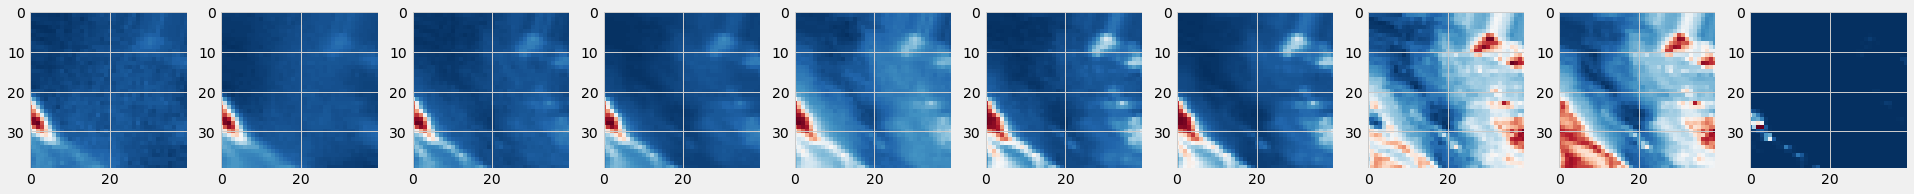

In [0]:
genTrain2 = img_datagen.flow(train, batch_size=train.shape[0], shuffle=False)[0]
img = genTrain2[0]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 30))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(img[:, :, i], cmap=color_map)

plt.show()